In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(dataset_path)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)

Attrition Rate:
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


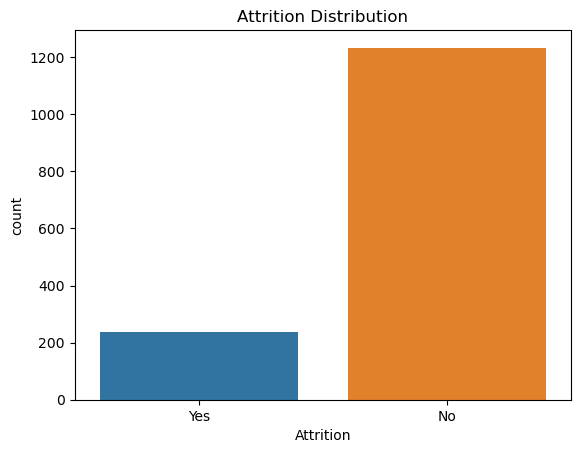

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

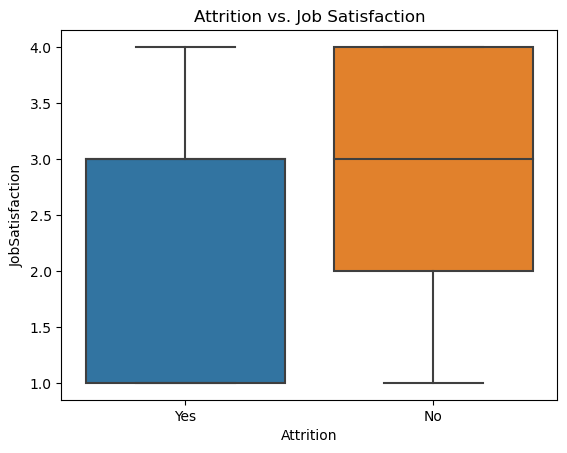

In [7]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Attrition vs. Job Satisfaction')
plt.show()

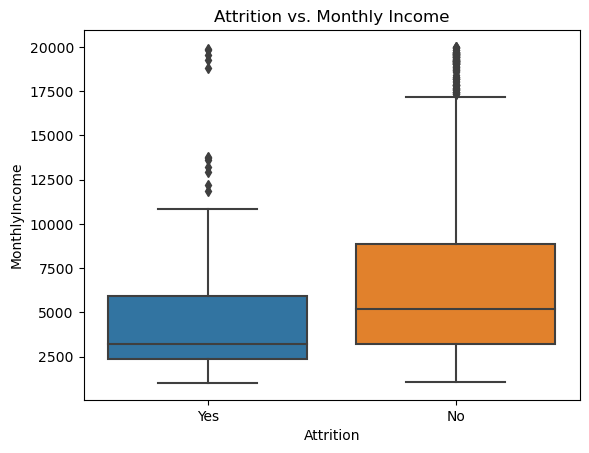

In [8]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs. Monthly Income')
plt.show()

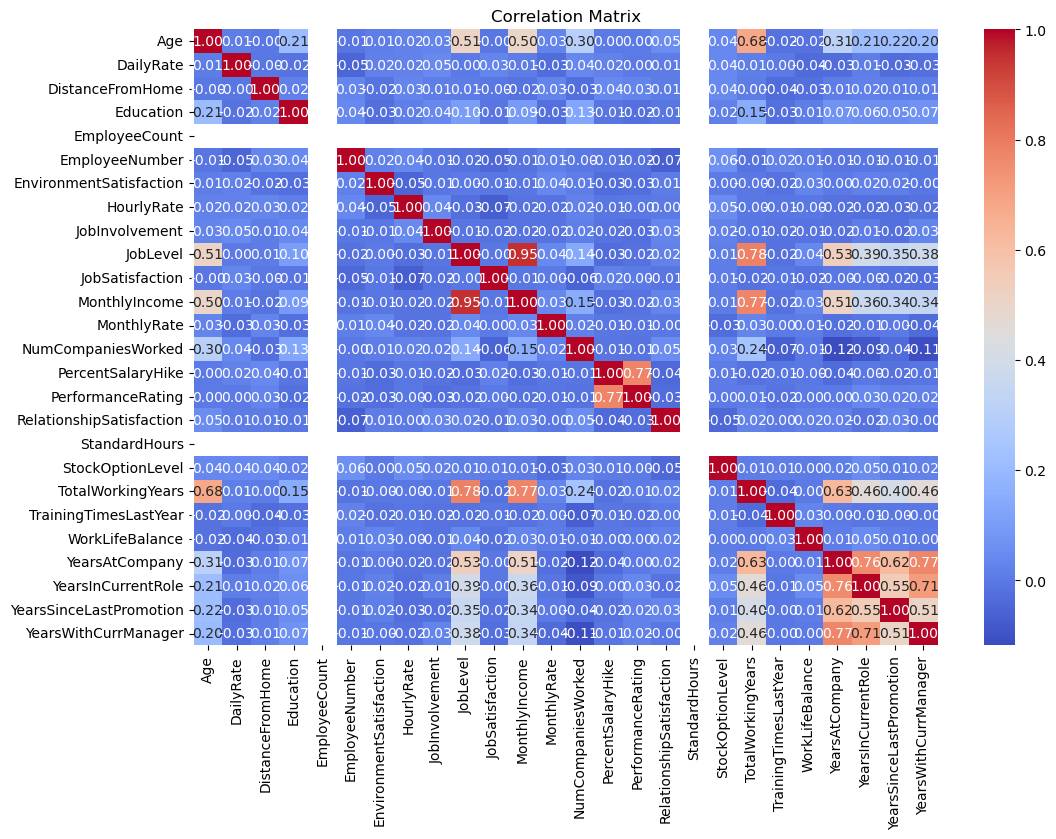

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train, y_train)

y_pred = logistic_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.86
Confusion Matrix:
[[253   2]
 [ 38   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.79
Confusion Matrix:
[[223  32]
 [ 30   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.22      0.23      0.23        39

    accuracy                           0.79       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.79      0.79      0.79       294



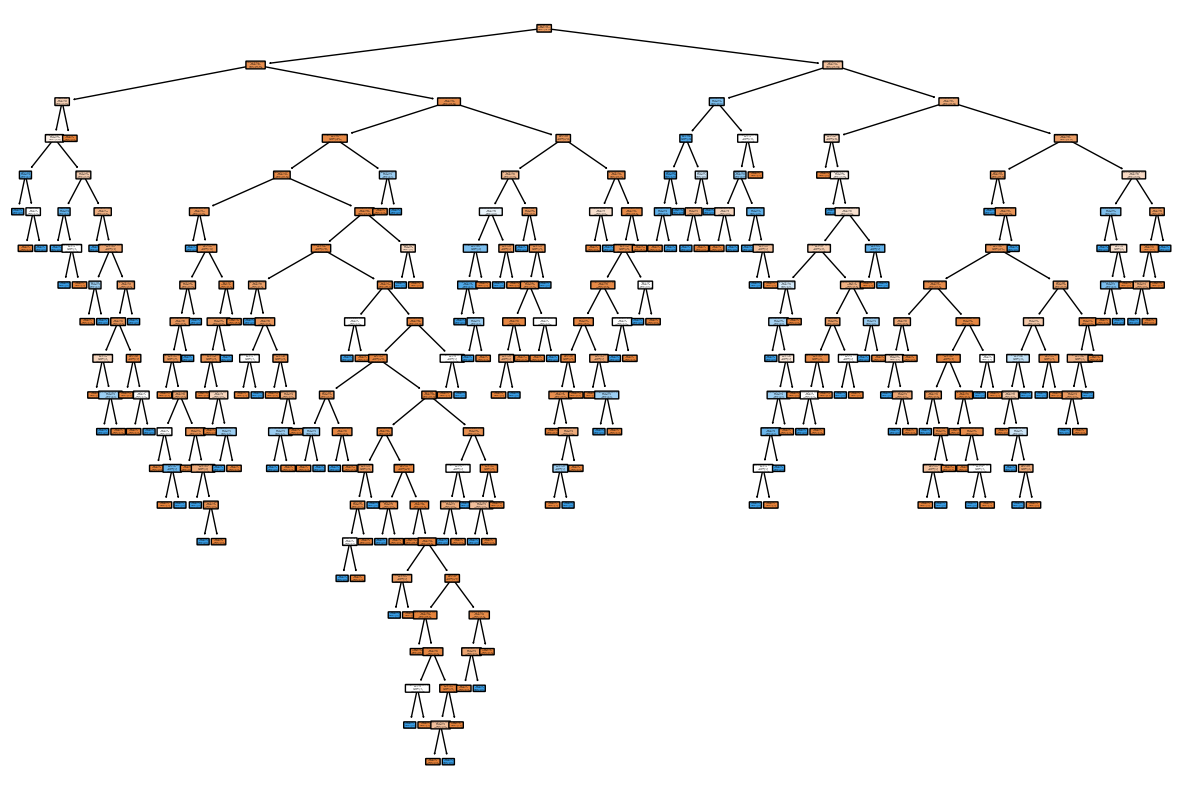

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=features, class_names=['No Attrition', 'Attrition'], filled=True, rounded=True)
plt.show()


Accuracy: 0.86
Confusion Matrix:
[[247   8]
 [ 32   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.47      0.18      0.26        39

    accuracy                           0.86       294
   macro avg       0.68      0.57      0.59       294
weighted avg       0.83      0.86      0.84       294



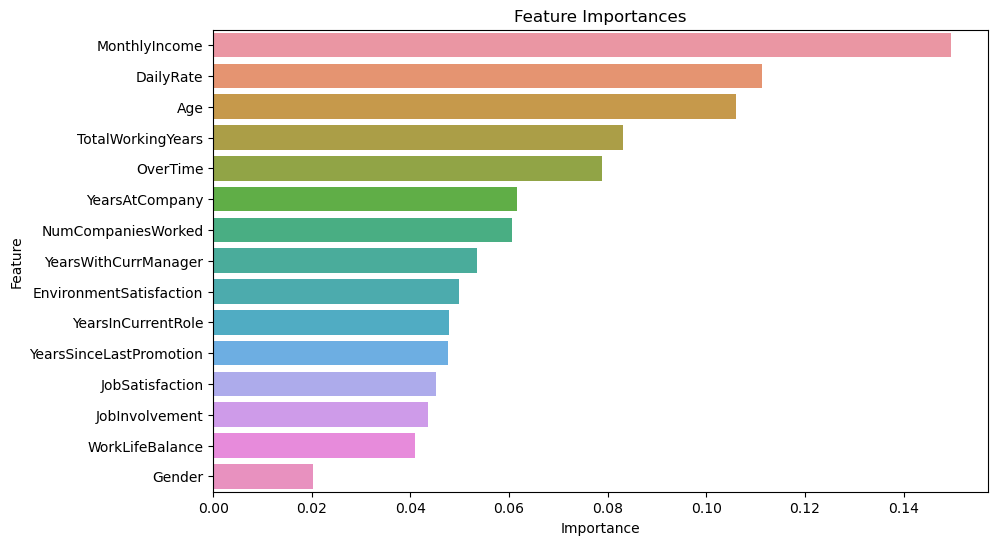

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

feature_importances = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.87
Confusion Matrix:
[[254   1]
 [ 36   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42))
}

for model_name, model in models.items():
    if 'SVM' in model_name:
        model = make_pipeline(StandardScaler(), model)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-validation Scores: {cv_scores}")
    print(f"{model_name} Mean CV Score: {cv_scores.mean()}")

for model_name, model in models.items():
    if 'SVM' in model_name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Cross-validation Scores: [0.83898305 0.84255319 0.8212766  0.82978723 0.82553191]
Logistic Regression Mean CV Score: 0.8316263974035341
Decision Tree Cross-validation Scores: [0.79237288 0.80425532 0.7787234  0.74893617 0.75744681]
Decision Tree Mean CV Score: 0.7763469166967183
Random Forest Cross-validation Scores: [0.86440678 0.87234043 0.83829787 0.85531915 0.85531915]
Random Forest Mean CV Score: 0.8571366750811397
SVM Cross-validation Scores: [0.86016949 0.85106383 0.82978723 0.83829787 0.85957447]
SVM Mean CV Score: 0.8477785791561485

Logistic Regression Performance Metrics:
Accuracy: 0.86
Precision: 0.33
Recall: 0.03
F1 Score: 0.05
Confusion Matrix:
[[253   2]
 [ 38   1]]


Decision Tree Performance Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.23
F1 Score: 0.23
Confusion Matrix:
[[223  32]
 [ 30   9]]



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance Metrics:
Accuracy: 0.86
Precision: 0.47
Recall: 0.18
F1 Score: 0.26
Confusion Matrix:
[[247   8]
 [ 32   7]]


SVM Performance Metrics:
Accuracy: 0.87
Precision: 0.75
Recall: 0.08
F1 Score: 0.14
Confusion Matrix:
[[254   1]
 [ 36   3]]



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42))
}

for model_name, model in models.items():
    if 'SVM' in model_name:
              model = make_pipeline(StandardScaler(), model)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-validation Scores: {cv_scores}")
    print(f"{model_name} Mean CV Score: {cv_scores.mean()}")

for model_name, model in models.items():
    if 'SVM' in model_name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Cross-validation Scores: [0.83898305 0.84255319 0.8212766  0.82978723 0.82553191]
Logistic Regression Mean CV Score: 0.8316263974035341
Decision Tree Cross-validation Scores: [0.79237288 0.80425532 0.7787234  0.74893617 0.75744681]
Decision Tree Mean CV Score: 0.7763469166967183
Random Forest Cross-validation Scores: [0.86440678 0.87234043 0.83829787 0.85531915 0.85531915]
Random Forest Mean CV Score: 0.8571366750811397
SVM Cross-validation Scores: [0.86016949 0.85106383 0.82978723 0.83829787 0.85957447]
SVM Mean CV Score: 0.8477785791561485

Logistic Regression Performance Metrics:
Accuracy: 0.86
Precision: 0.33
Recall: 0.03
F1 Score: 0.05
Confusion Matrix:
[[253   2]
 [ 38   1]]


Decision Tree Performance Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.23
F1 Score: 0.23
Confusion Matrix:
[[223  32]
 [ 30   9]]



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance Metrics:
Accuracy: 0.86
Precision: 0.47
Recall: 0.18
F1 Score: 0.26
Confusion Matrix:
[[247   8]
 [ 32   7]]


SVM Performance Metrics:
Accuracy: 0.87
Precision: 0.75
Recall: 0.08
F1 Score: 0.14
Confusion Matrix:
[[254   1]
 [ 36   3]]



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42))
}

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", grid_search.best_params_)

models['Random Forest (Tuned)'] = best_rf_model

for model_name, model in models.items():
    if 'SVM' in model_name:
        model = make_pipeline(StandardScaler(), model)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-validation Scores: {cv_scores}")
    print(f"{model_name} Mean CV Score: {cv_scores.mean()}")

for model_name, model in models.items():
    if 'SVM' in model_name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Logistic Regression Cross-validation Scores: [0.83898305 0.84255319 0.8212766  0.82978723 0.82553191]
Logistic Regression Mean CV Score: 0.8316263974035341

Decision Tree Cross-validation Scores: [0.79237288 0.80425532 0.7787234  0.74893617 0.75744681]
Decision Tree Mean CV Score: 0.7763469166967183


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Random Forest Cross-validation Scores: [0.86440678 0.87234043 0.83829787 0.85531915 0.85531915]
Random Forest Mean CV Score: 0.8571366750811397

SVM Cross-validation Scores: [0.86016949 0.85106383 0.82978723 0.83829787 0.85957447]
SVM Mean CV Score: 0.8477785791561485

Random Forest (Tuned) Cross-validation Scores: [0.86864407 0.88510638 0.85106383 0.85106383 0.85957447]
Random Forest (Tuned) Mean CV Score: 0.8630905156869815

Logistic Regression Performance Metrics:
Accuracy: 0.86
Precision: 0.33
Recall: 0.03
F1 Score: 0.05
Confusion Matrix:
[[253   2]
 [ 38   1]]


Decision Tree Performance Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.23
F1 Score: 0.23
Confusion Matrix:
[[223  32]
 [ 30   9]]



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance Metrics:
Accuracy: 0.86
Precision: 0.47
Recall: 0.18
F1 Score: 0.26
Confusion Matrix:
[[247   8]
 [ 32   7]]


SVM Performance Metrics:
Accuracy: 0.87
Precision: 0.75
Recall: 0.08
F1 Score: 0.14
Confusion Matrix:
[[254   1]
 [ 36   3]]


Random Forest (Tuned) Performance Metrics:
Accuracy: 0.86
Precision: 0.45
Recall: 0.13
F1 Score: 0.20
Confusion Matrix:
[[249   6]
 [ 34   5]]



In [19]:

best_model = None
best_metrics = {'F1 Score': 0}

for model_name, model in models.items():
    if 'SVM' in model_name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    if f1 > best_metrics['F1 Score']:
        best_metrics['F1 Score'] = f1
        best_model = model_name

print(f"The Best Performing Model is: {best_model} with an F1 Score of {best_metrics['F1 Score']:.2f}")


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance Metrics:
Accuracy: 0.86
Precision: 0.33
Recall: 0.03
F1 Score: 0.05
Confusion Matrix:
[[253   2]
 [ 38   1]]


Decision Tree Performance Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.23
F1 Score: 0.23
Confusion Matrix:
[[223  32]
 [ 30   9]]


Random Forest Performance Metrics:
Accuracy: 0.86
Precision: 0.47
Recall: 0.18
F1 Score: 0.26
Confusion Matrix:
[[247   8]
 [ 32   7]]


SVM Performance Metrics:
Accuracy: 0.87
Precision: 0.75
Recall: 0.08
F1 Score: 0.14
Confusion Matrix:
[[254   1]
 [ 36   3]]


Random Forest (Tuned) Performance Metrics:
Accuracy: 0.86
Precision: 0.45
Recall: 0.13
F1 Score: 0.20
Confusion Matrix:
[[249   6]
 [ 34   5]]

The Best Performing Model is: Random Forest with an F1 Score of 0.26


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\sv697\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

features = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Gender', 'OverTime']

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", grid_search.best_params_)

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nBest Random Forest Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}\n")


Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Model Performance Metrics:
Accuracy: 0.86
Precision: 0.45
Recall: 0.13
F1 Score: 0.20
Confusion Matrix:
[[249   6]
 [ 34   5]]



In [22]:
import joblib

model_filename = "best_random_forest_model.joblib"
joblib.dump(best_rf_model, model_filename)

print(f"Best Random Forest Model saved as {model_filename}")
print(f"The decision is based on the F1 score, and the chosen model achieved an F1 score of {f1:.2f}")


Best Random Forest Model saved as best_random_forest_model.joblib
The decision is based on the F1 score, and the chosen model achieved an F1 score of 0.20
